In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
application = pd.read_csv("application_clean.csv")

In [ ]:
application.head(2)

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,5008806,0,1,1,0,112500.0,-21474,-1134,0,...,1,0,0,0,0,1,0,0,0,0
1,1,5008810,1,0,1,0,270000.0,-19110,-3051,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
application.info()

In [ ]:
X = application.loc[:, (application.columns != "STATUS") & (application.columns != "Unnamed: 0")]
Y = application["STATUS"]
X

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806,0,1,1,0,112500.0,-21474,-1134,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5008810,1,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,1,0,0,0,0
2,5008811,1,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,1,0,0,0,0
3,5112956,0,1,1,0,270000.0,-16872,-769,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5008825,1,1,0,0,130500.0,-10669,-1103,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,5149042,1,0,1,0,180000.0,-19750,-3608,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,5149056,1,0,1,0,112500.0,-15837,-2694,1,1,...,1,0,0,0,0,1,0,0,0,0
16647,5149145,0,1,1,0,247500.0,-10952,-3577,1,0,...,1,0,0,0,0,1,0,0,0,0
16648,5149158,0,1,1,0,247500.0,-10952,-3577,1,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11655, 33), (4995, 33), (11655,), (4995,))

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

[Text(0.3815012107607466, 0.9782608695652174, 'x[7] <= -1935.5\ngini = 0.023\nsamples = 11655\nvalue = [137, 11518]'),
 Text(0.2675217848557692, 0.9347826086956522, 'x[4] <= 3.5\ngini = 0.011\nsamples = 5368\nvalue = [31, 5337]'),
 Text(0.2126453796662896, 0.8913043478260869, 'x[29] <= 0.5\ngini = 0.011\nsamples = 5358\nvalue = [30, 5328]'),
 Text(0.13343555571266968, 0.8478260869565217, 'x[5] <= 49500.0\ngini = 0.01\nsamples = 5174\nvalue = [26, 5148]'),
 Text(0.10023684954751132, 0.8043478260869565, 'x[0] <= 5125666.0\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.09571196266968326, 0.7608695652173914, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.10476173642533937, 0.7608695652173914, 'x[0] <= 5125669.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.10023684954751132, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10928662330316742, 0.717391304347826, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.16663426187782807, 0.8043478260869

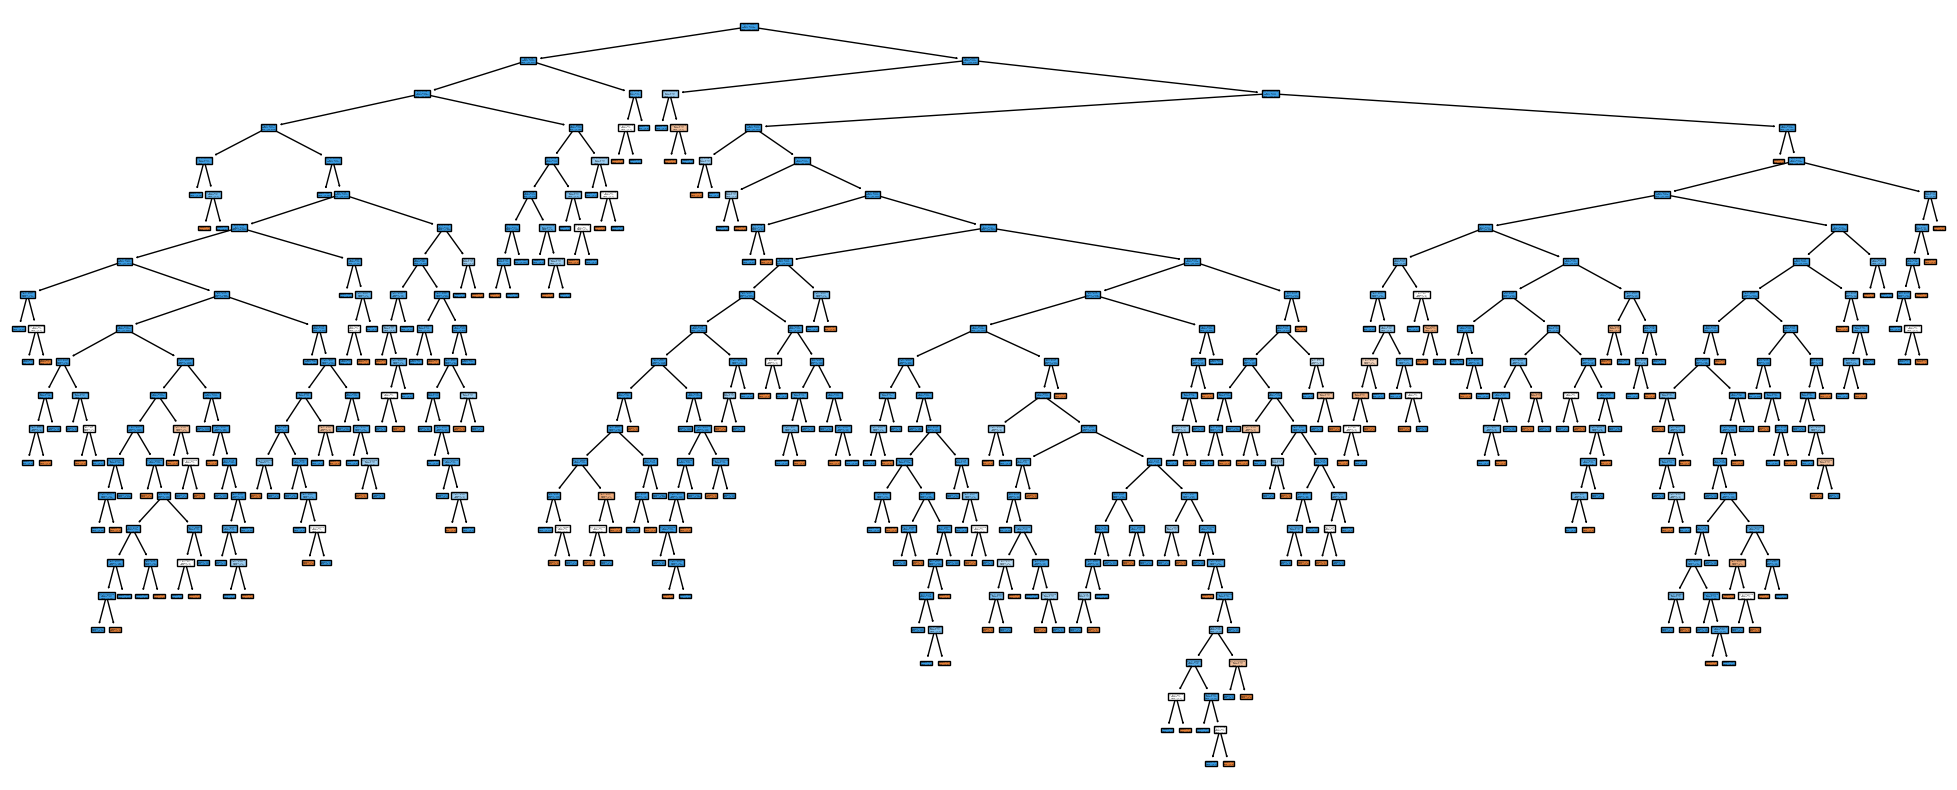

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True)

In [ ]:
predicted = clf.predict(X=x_test)

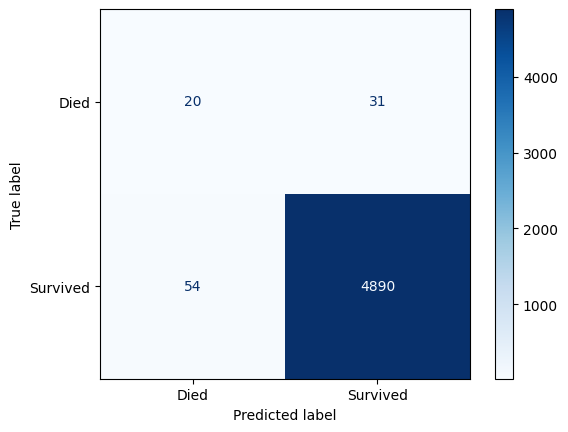

In [ ]:
cm = confusion_matrix(y_pred=predicted, y_true=y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

In [ ]:
accuracy_score(y_pred=predicted, y_true=y_test)

0.982982982982983